In [1]:
pip install tensorflow scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


### importing modules 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import os 

Epoch 1/10
78/78 [==============================] - 25s 272ms/step - loss: 0.5068 - accuracy: 0.7485 - val_loss: 0.4048 - val_accuracy: 0.8204
Epoch 2/10
78/78 [==============================] - 40s 520ms/step - loss: 0.3498 - accuracy: 0.8457 - val_loss: 0.3160 - val_accuracy: 0.8689
Epoch 3/10
78/78 [==============================] - 15s 193ms/step - loss: 0.2235 - accuracy: 0.9085 - val_loss: 0.1967 - val_accuracy: 0.9207
Epoch 4/10
78/78 [==============================] - 16s 201ms/step - loss: 0.0964 - accuracy: 0.9700 - val_loss: 0.1020 - val_accuracy: 0.9660
Epoch 5/10
78/78 [==============================] - 29s 375ms/step - loss: 0.0639 - accuracy: 0.9818 - val_loss: 0.0894 - val_accuracy: 0.9595
Epoch 6/10
78/78 [==============================] - 16s 210ms/step - loss: 0.0386 - accuracy: 0.9903 - val_loss: 0.0810 - val_accuracy: 0.9709
Epoch 7/10
78/78 [==============================] - 62s 803ms/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.0676 - val_accuracy: 0.9757

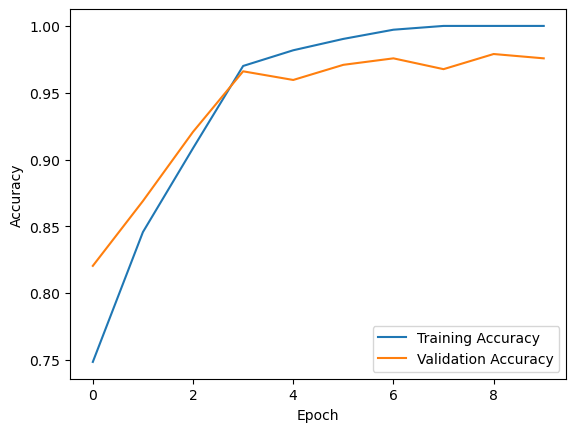

In [7]:
# Load your dataset (adjust file paths and format accordingly)
import zipfile

# Replace 'your_dataset.zip' with the actual name of your ZIP file
with zipfile.ZipFile('Cancer Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('your_dataset_folder')

# Assuming you have a directory 'data' containing 'no' and 'yes' subdirectories with images
from tensorflow.keras.preprocessing.image import load_img, img_to_array

normal_images = []
cancer_images = []
pred = []

# Load Normal Images
for filename in os.listdir('your_dataset_folder/no'):
    img = load_img(os.path.join('your_dataset_folder/no', filename), target_size=(64, 64))
    img_array = img_to_array(img)
    normal_images.append(img_array)
    pred.append('no')

# Load Cancer Images
for filename in os.listdir('your_dataset_folder/yes'):
    img = load_img(os.path.join('your_dataset_folder/yes', filename), target_size=(64, 64))
    img_array = img_to_array(img)
    cancer_images.append(img_array)
    pred.append('yes')

# Convert lists to arrays
X = np.array(normal_images + cancer_images)
y = np.array(pred)

# Encode labels (Normal: 0, Cancer: 1)
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize pixel values
X = X / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
